# Economic reforms in 1984-1990s: A possible relationship to child poverty

The very simple question this analysis asks is whether the economic reforms of the 1980-1990s period such that they form a switchpoint from one set-point of child poverty levels to another, higher, setpoint. The rationale for this argument is both theoretically and empirically driven. 

The reforms and their relative merits still are debated. As these debates are somewhat uninteresting to the writer, it would be preferable to read from a renowned expert from that era, [Brian Easton](https://www.eastonbh.ac.nz/1994/10/economic_and_other_ideas_behind_the_new_zealand_reforms/)

There are a number of theorists who postulate that economic reforms toward a market economy increase rates of child poverty. The representative arguments are from the intuitive (a less caring society) to the complex in terms of economic theory. It appears that the arguments also are sustained from some datasources. 

Empirically, the first argument that the reforms, termed locally as 'Rogernomics', is that rates appear sigmoidal when inspecting the data. See Figure 1 below. The implication of this shape is that there was a lower rate prior to some date in the 1990s and a higher one later. The intervening slope between the two rates is viewed as representing an increase in the rate at which child poverty increases.

The data examined here are from Figure 2. of the [Child Poverty Monitor](http://nzchildren.co.nz/), downloaded from B Perry's 2017 [report](http://www.msd.govt.nz/about-msd-and-our-work/publications-resources/monitoring/household-incomes/index.html),  Table F.7. I note that Figures 1-6 **all** indicate a rise around 1990 in whichever measure of poverty is used. Furthermore, selection of data from Figure 2 is limited by the fact that from 2008, data are a rolling mean. The data are, however, probably the best available. That better or more clear measures can and ought to be used is something the Prime Minister, Ms Adern, is addressing. 

The analysis itself is an unashamed copy of the canonical analysis of [coal-mining disasters](https://pymc-devs.github.io/pymc/tutorial.html). Poverty rate (as a standardised percentage) appears to equate to death rates conceptually well enough for this initial foray. 

In [42]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm

In [43]:
ydata = np.array([14,15,11,13,16,27,29,28,28,30,28,25,27,28,28,27,24,29,28,25])
year = np.array([1982,1984,1986,1988,1990,1992,1994,1996,1998,2001,2004,2008,2009,2010,2011,2012,2013,2014,2015,2016])

<IPython.core.display.Javascript object>


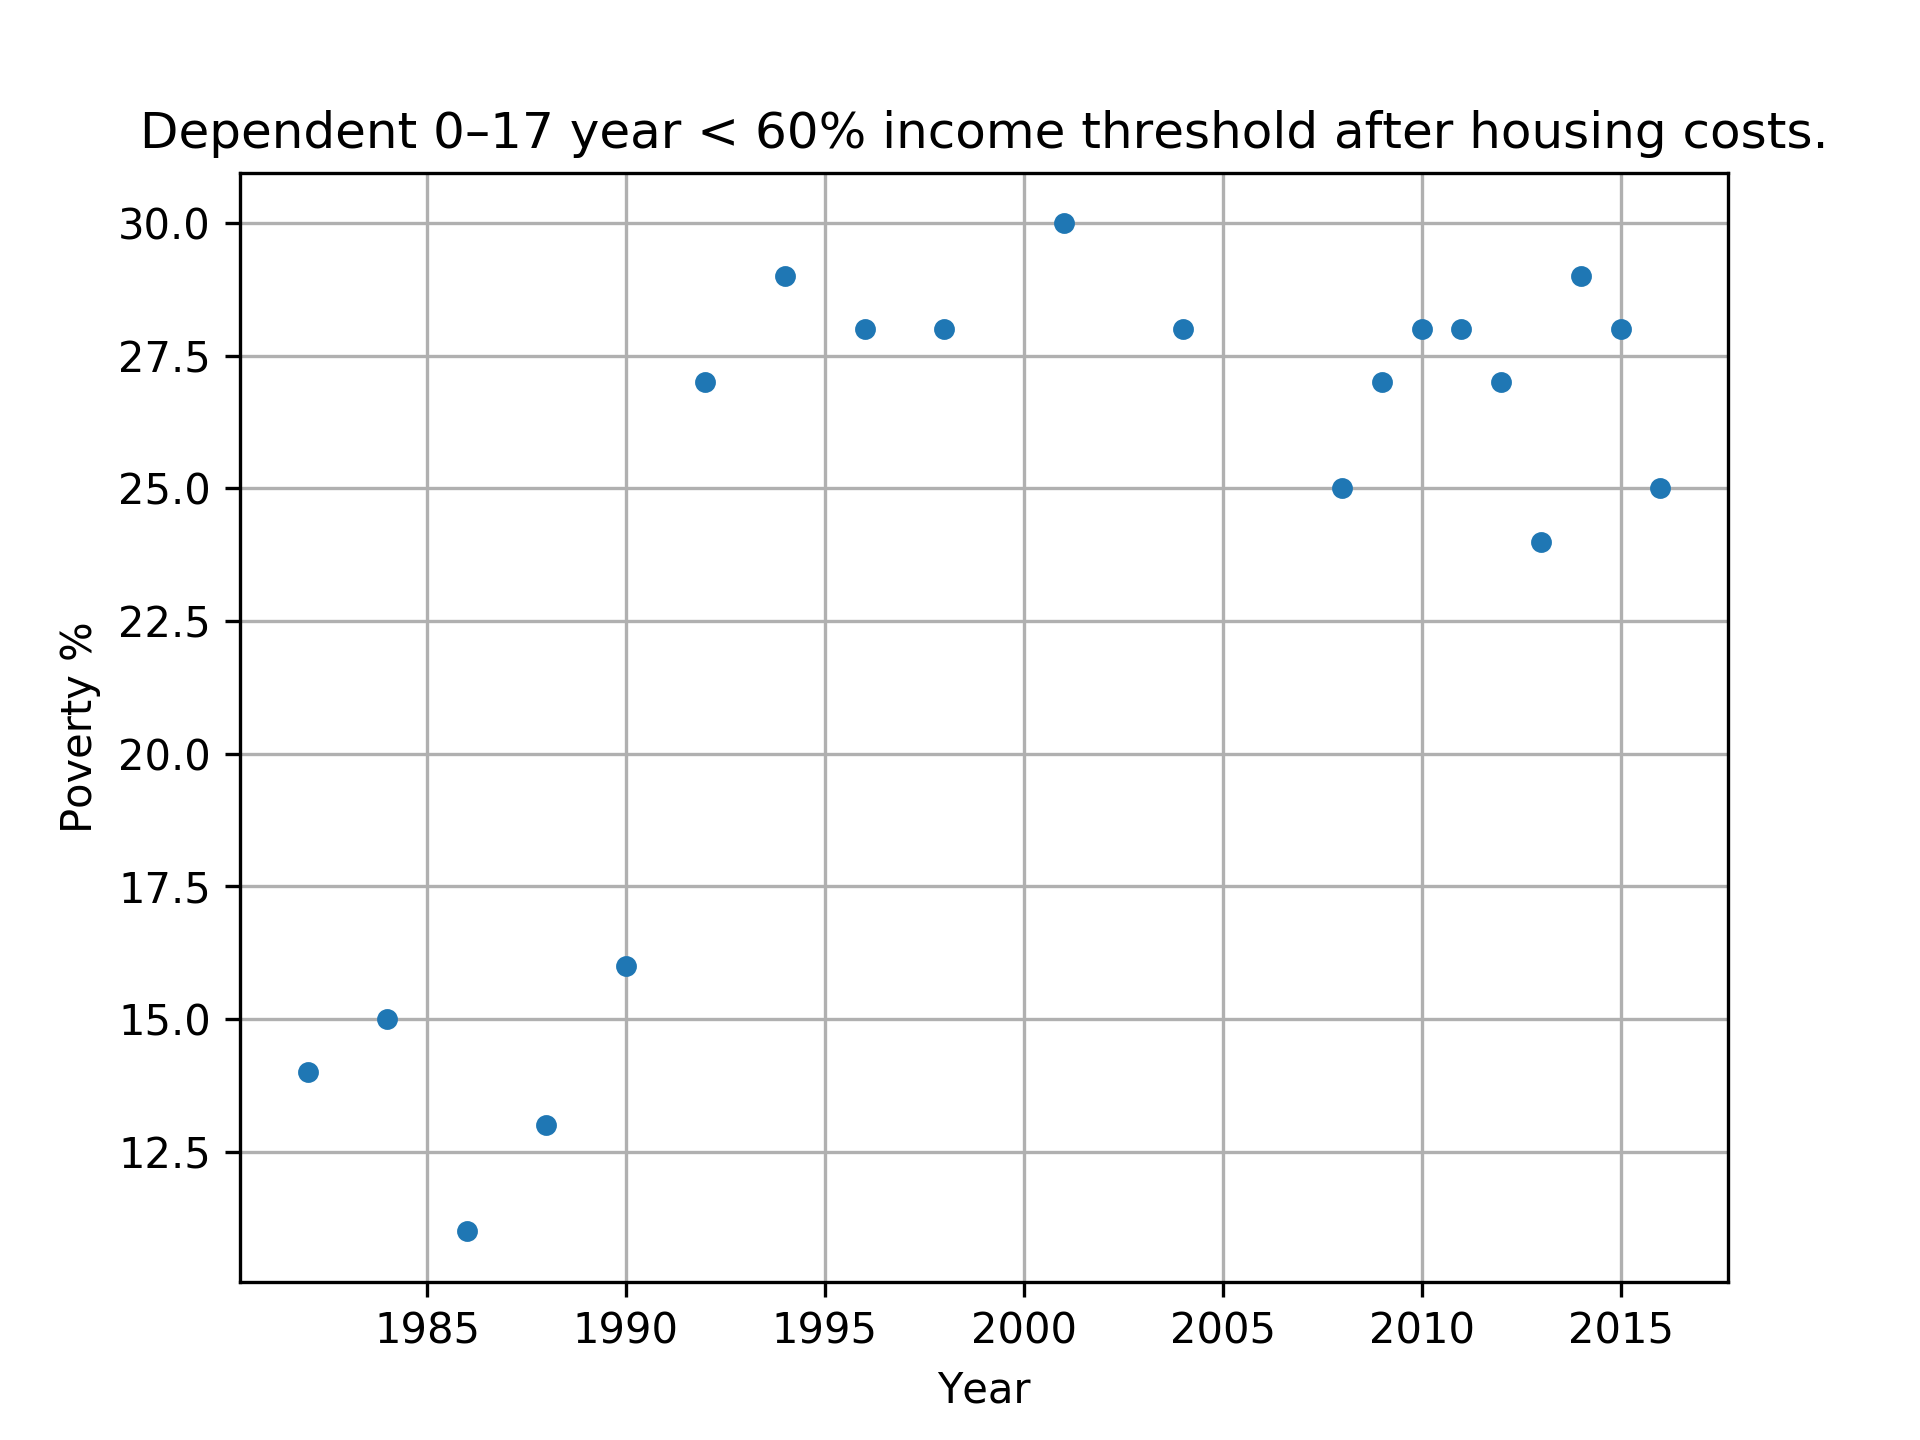

In [44]:
fig, ax0 = plt.subplots()
ax0.plot(year, ydata, 'o', markersize=4);
ax0.set_title("Dependent 0–17 year < 60% income threshold after housing costs.")
ax0.set_ylabel("Poverty %")
ax0.set_xlabel("Year")
ax0.grid()

In [45]:
with pm.Model() as poverty_model:

    switchpoint = pm.DiscreteUniform('switchpoint', lower=year.min(), upper=year.max(), testval=1996)

    # Priors for pre- and post-switch rates number of disasters
    early_rate = pm.Exponential('early_rate', 1)
    late_rate = pm.Exponential('late_rate', 1)

    # Allocate appropriate Poisson rates to years before and after current
    rate = pm.math.switch(switchpoint >= year, early_rate, late_rate)

    disasters = pm.Poisson('disasters', rate, observed=ydata)

with poverty_model:
    trace = pm.sample(10000)

Assigned Metropolis to switchpoint
INFO:pymc3:Assigned Metropolis to switchpoint
Assigned NUTS to early_rate_log__
INFO:pymc3:Assigned NUTS to early_rate_log__
Assigned NUTS to late_rate_log__
INFO:pymc3:Assigned NUTS to late_rate_log__
/Users/LlewelynRW/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
 99%|█████████▉| 10441/10500 [00:06<00:00, 1533.36it/s]/Users/LlewelynRW/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.8815944342388946, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 10500/10500 [00:06

<IPython.core.display.Javascript object>


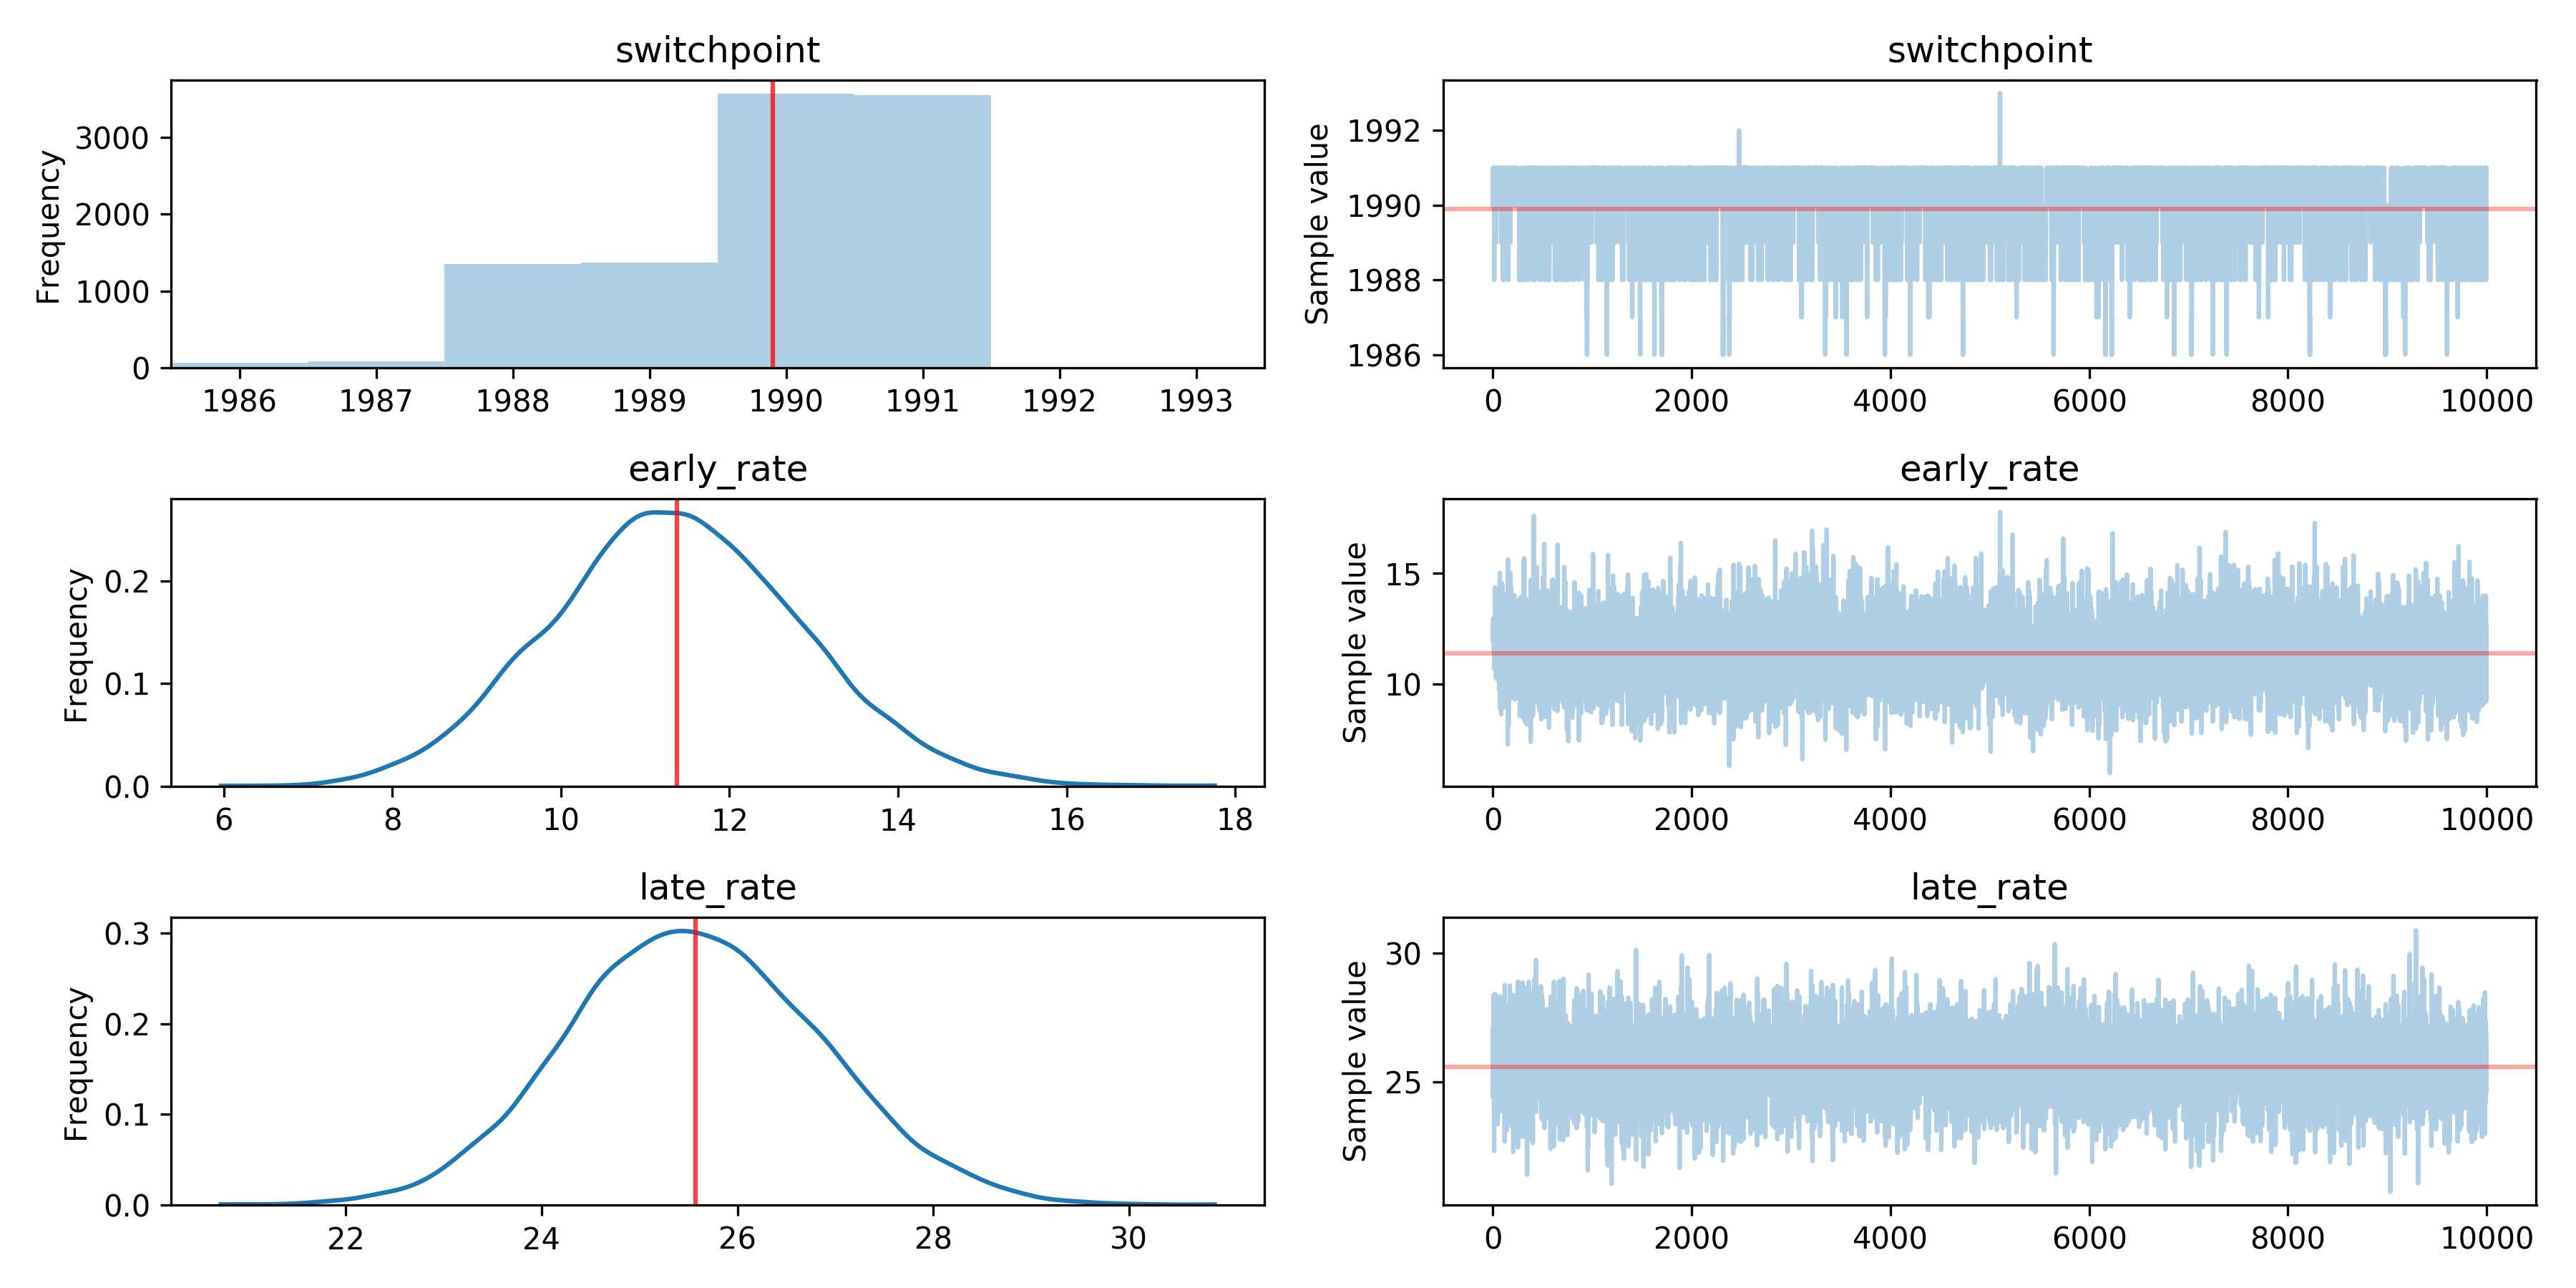

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12db81780>,
      dtype=object)

In [46]:
pm.traceplot(trace, lines={'early_rate':trace.early_rate.mean(),
                                        'late_rate':trace.late_rate.mean(),
                                        'switchpoint':trace.switchpoint.mean()})
# plt.show()

In [47]:
pm.summary(trace)


switchpoint:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1989.900         1.097            0.028            [1988.000, 1991.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1988.000       1989.000       1990.000       1991.000       1991.000


early_rate:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  11.380           1.488            0.018            [8.574, 14.372]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  8.543          10.384         11.352         12.371         14.365


late_rate:

  Mean             SD               MC Error         95% HPD interval
 

## Conclusion

The Bayesian approach suggests that there was a fundamental change in the rate of child poverty, defined as the number of dependent 17 year olds living within an adjusted for household  income less than 60% of the median. The specific estimate indicates a 95% level of confidence that the change occurred between 1988-1991. It seems that one can alos be 95% confident that the rate shifted upward from 8.6-14.4% to 23.1-28.2%. 

The question, indeed the big question, is whether the (failed) attempts since 2000 by successive Labour and National dominated approaches can ever have worked in the absence of a reversal of the more fundamental economic drivers. 